# StratifiedGroupKFold

In [1]:
from stratified_group_kfold import StratifiedGroupKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_splits = 5
n_samples = 500
n_labels = 5
n_groups = 100

# generate random dataset
x = range(n_samples)
labels = np.random.randint(0, n_labels, size=n_samples)
groups = np.random.randint(0, n_groups, size=n_samples)

In [2]:
df = pd.DataFrame({'x': x, 'label': labels, 'group': groups})

## Visualize generated dataset

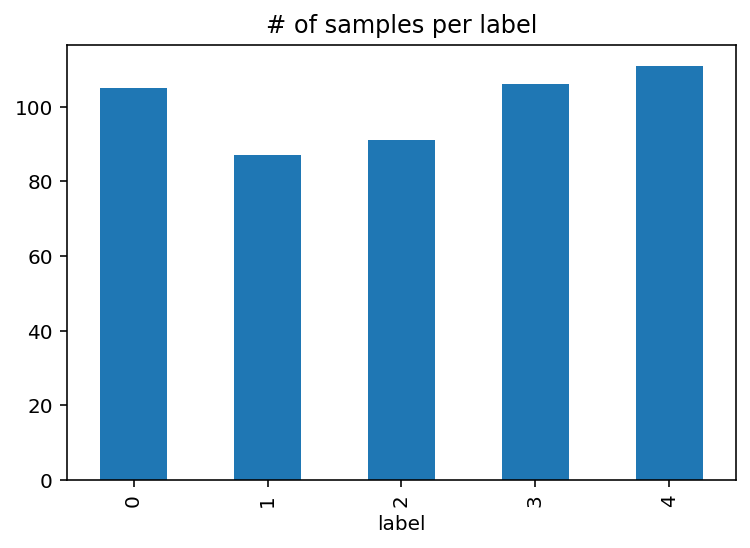

In [3]:
df.groupby('label')['x'].count().plot(kind='bar',
                                      title='# of samples per label')

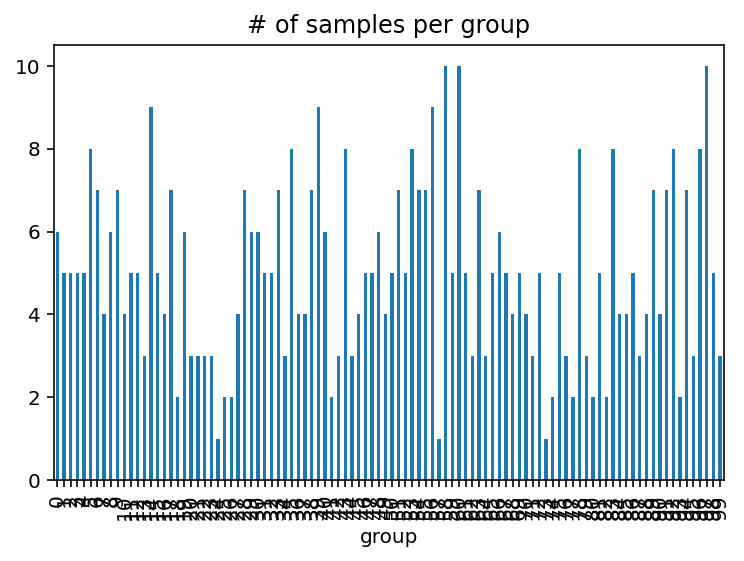

In [4]:
df.groupby('group')['x'].count().plot(kind='bar',
                                      title='# of samples per group')

## Split with StratifiedGroupKFold

21 groups in test, 79 groups in train and 0 in both
19 groups in test, 81 groups in train and 0 in both
21 groups in test, 79 groups in train and 0 in both
19 groups in test, 81 groups in train and 0 in both
20 groups in test, 80 groups in train and 0 in both


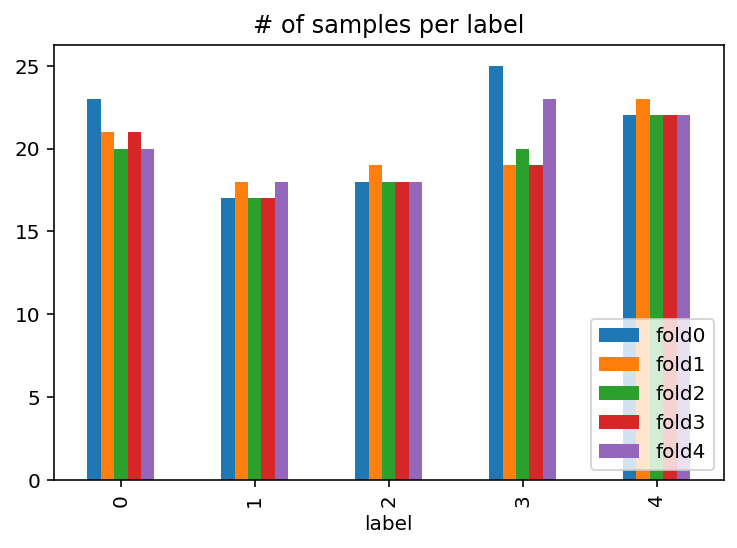

In [5]:
kf = StratifiedGroupKFold(n_splits, shuffle=True)
label_counts = []
for i_fold, (train_index, test_index) in enumerate(kf.split(x, labels,
                                                            groups)):
    df_test = df.iloc[test_index]
    label_counts.append(df_test.groupby('label')['x'].count())

    test_groups = set(df['group'][test_index])
    train_groups = set(df['group'][train_index])
    print('{} groups in test, {} groups in train and {} in both'.format(
        len(test_groups), len(train_groups), len(test_groups & train_groups)))

pd.DataFrame(label_counts,
             index=['fold{}'.format(i) for i in range(len(label_counts))
                    ]).T.plot(kind='bar', title='# of samples per label')
plt.legend(loc='lower right')

## Split with StratifiedKFold

64 groups in test, 100 groups in train and 64 in both
60 groups in test, 100 groups in train and 60 in both
69 groups in test, 97 groups in train and 66 in both
67 groups in test, 100 groups in train and 67 in both
62 groups in test, 100 groups in train and 62 in both


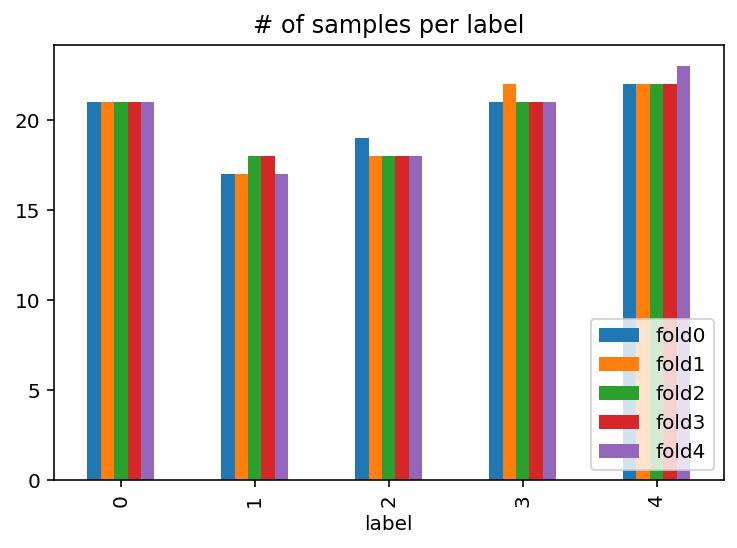

In [6]:
from sklearn.model_selection import StratifiedKFold, GroupKFold
kf = StratifiedKFold(n_splits, shuffle=True)
label_counts = []
for i_fold, (train_index, test_index) in enumerate(kf.split(x, labels)):
    df_test = df.iloc[test_index]
    label_counts.append(df_test.groupby('label')['x'].count())

    test_groups = set(df['group'][test_index])
    train_groups = set(df['group'][train_index])
    print('{} groups in test, {} groups in train and {} in both'.format(
        len(test_groups), len(train_groups), len(test_groups & train_groups)))

pd.DataFrame(label_counts,
             index=['fold{}'.format(i) for i in range(len(label_counts))
                    ]).T.plot(kind='bar', title='# of samples per label')
plt.legend(loc='lower right')

## Split with GroupKFold

20 groups in test, 80 groups in train and 0 in both
20 groups in test, 80 groups in train and 0 in both
20 groups in test, 80 groups in train and 0 in both
20 groups in test, 80 groups in train and 0 in both
20 groups in test, 80 groups in train and 0 in both


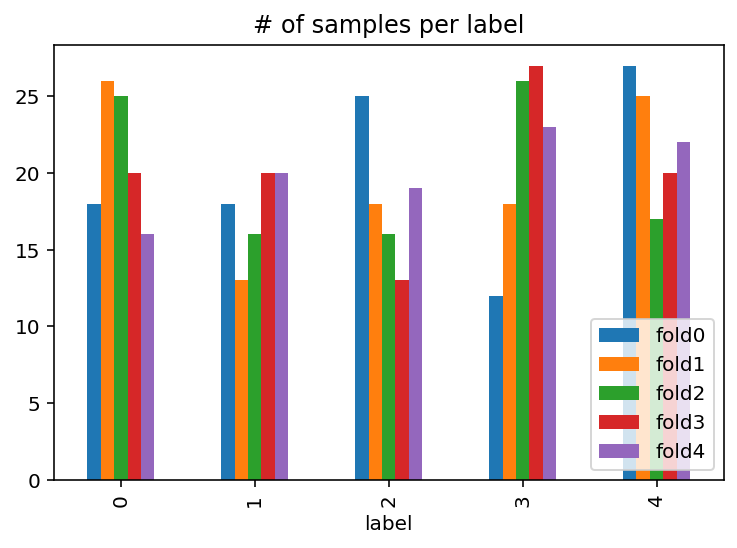

In [7]:
kf = GroupKFold(n_splits)
label_counts = []
for i_fold, (train_index, test_index) in enumerate(kf.split(x, groups=groups)):
    df_test = df.iloc[test_index]
    label_counts.append(df_test.groupby('label')['x'].count())

    test_groups = set(df['group'][test_index])
    train_groups = set(df['group'][train_index])
    print('{} groups in test, {} groups in train and {} in both'.format(
        len(test_groups), len(train_groups), len(test_groups & train_groups)))

pd.DataFrame(label_counts,
             index=['fold{}'.format(i) for i in range(len(label_counts))
                    ]).T.plot(kind='bar', title='# of samples per label')
plt.legend(loc='lower right')